In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68608000/68606236 [==============================] - 6s 0us/step


In [5]:
zip_dir

'/home/koichiro_mori/.keras/datasets/cats_and_dogs_filterted.zip'

In [6]:
zip_dir_base = os.path.dirname(zip_dir)

In [7]:
zip_dir_base

'/home/koichiro_mori/.keras/datasets'

In [8]:
!find $zip_dir_base -type d -print

/home/koichiro_mori/.keras/datasets
/home/koichiro_mori/.keras/datasets/fashion-mnist
/home/koichiro_mori/.keras/datasets/cats_and_dogs_filtered
/home/koichiro_mori/.keras/datasets/cats_and_dogs_filtered/validation
/home/koichiro_mori/.keras/datasets/cats_and_dogs_filtered/validation/cats
/home/koichiro_mori/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/home/koichiro_mori/.keras/datasets/cats_and_dogs_filtered/train
/home/koichiro_mori/.keras/datasets/cats_and_dogs_filtered/train/cats
/home/koichiro_mori/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [9]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [10]:
base_dir

'/home/koichiro_mori/.keras/datasets/cats_and_dogs_filtered'

In [11]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [13]:
num_cats_tr, num_dogs_tr

(1000, 1000)

In [14]:
num_cats_val, num_dogs_val

(500, 500)

In [16]:
total_train, total_val

(2000, 1000)

In [17]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [18]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [21]:
train_image_generator

In [19]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
train_data_gen

In [22]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

(100, 150, 150, 3)

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

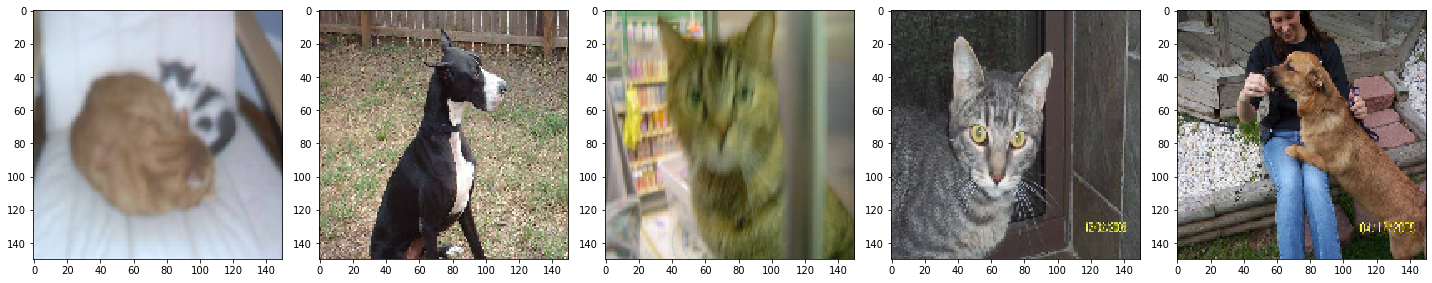

In [26]:
plotImages(sample_training_images[:5])

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [40]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 22s 1s/step - loss: 0.7145 - accuracy: 0.4955 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 22s 1s/step - loss: 0.6943 - accuracy: 0.5080 - val_loss: 0.6905 - val_accuracy: 0.5010
Epoch 3/100
20/20 [==============================] - 22s 1s/step - loss: 0.6789 - accuracy: 0.5805 - val_loss: 0.6616 - val_accuracy: 0.5880
Epoch 4/100
20/20 [==============================] - 22s 1s/step - loss: 0.6631 - accuracy: 0.5885 - val_loss: 0.6229 - val_accuracy: 0.6470
Epoch 5/100
20/20 [==============================] - 22s 1s/step - loss: 0.6062 - accuracy: 0.6685 - val_loss: 0.5897 - val_accuracy: 0.6850
Epoch 6/100
20/20 [==============================] - 22s 1s/step - loss: 0.5883 - accuracy: 0.6845 - val_loss: 0.6012 - val_accuracy: 0.6740
Epoch 7/100
20/20 [==============================] - 22s 1s/step - loss: 0.5504 - accuracy: 0.7205 - val_loss: 0.5733 - val_accuracy: 0.7060
Epoch 8/100
2

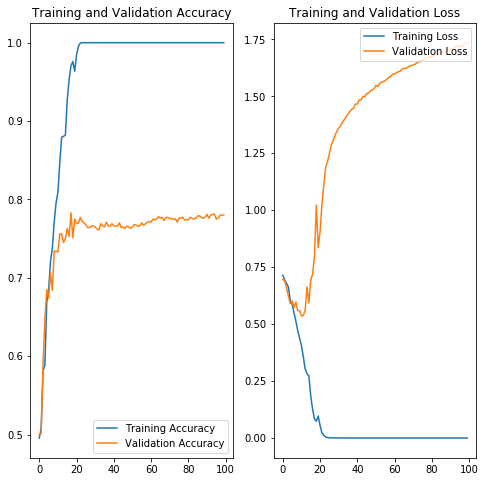

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

## Data Augmentation

In [42]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


In [49]:
train_data_gen[0][0].shape

(100, 150, 150, 3)

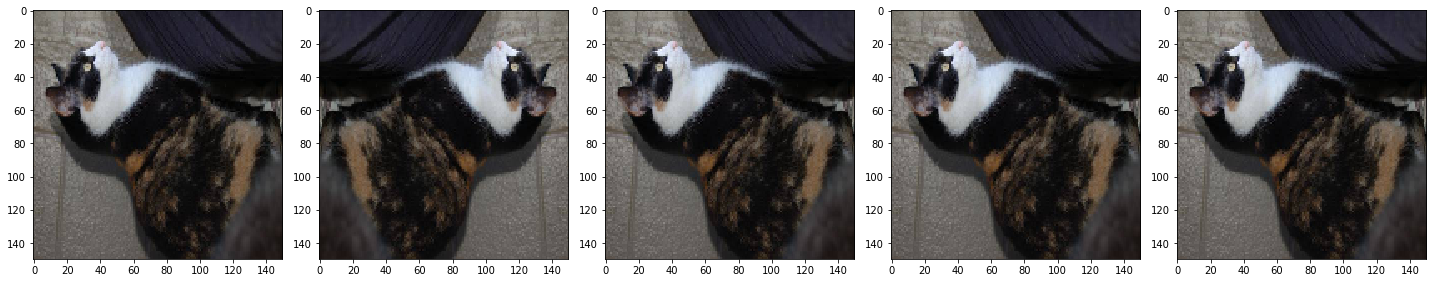

In [51]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [52]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


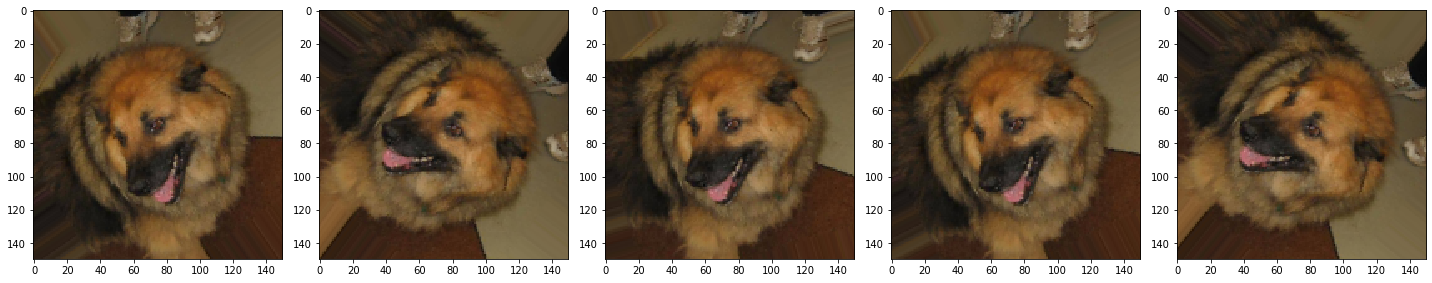

In [53]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [55]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


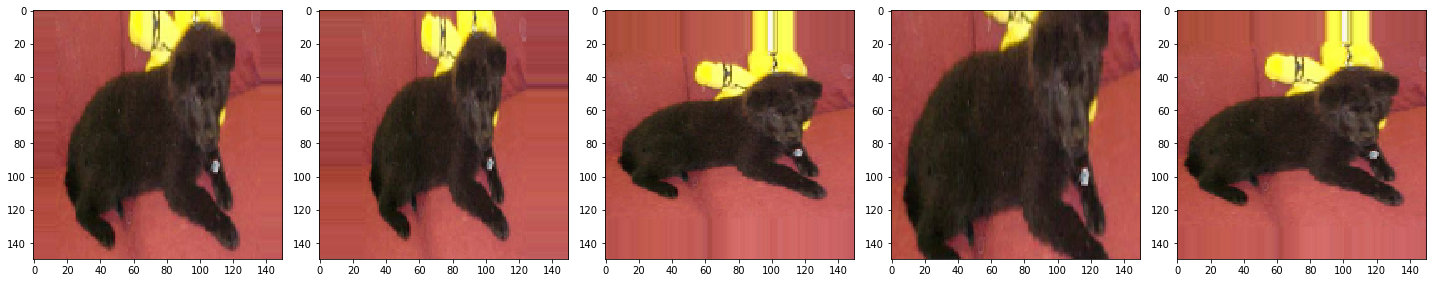

In [56]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [57]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [58]:
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


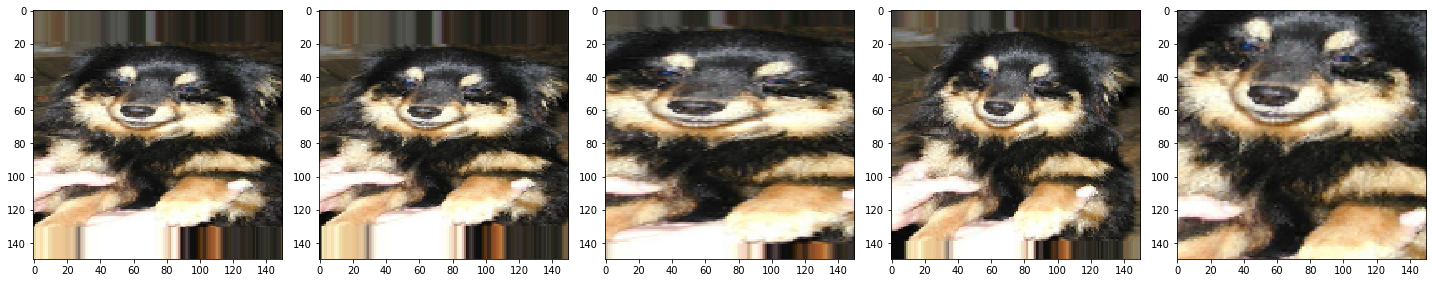

In [59]:
augmented_images = [train_data_gen[0][0][1] for i in range(5)]
plotImages(augmented_images)

In [60]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [64]:
epochs = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 23s 1s/step - loss: 0.7165 - accuracy: 0.5310 - val_loss: 0.6917 - val_accuracy: 0.5300
Epoch 2/100
20/20 [==============================] - 22s 1s/step - loss: 0.6886 - accuracy: 0.5435 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 21s 1s/step - loss: 0.6861 - accuracy: 0.5405 - val_loss: 0.6643 - val_accuracy: 0.5420
Epoch 4/100
20/20 [==============================] - 22s 1s/step - loss: 0.6762 - accuracy: 0.5655 - val_loss: 0.6693 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 22s 1s/step - loss: 0.6606 - accuracy: 0.5755 - val_loss: 0.6424 - val_accuracy: 0.6250
Epoch 6/100
20/20 [==============================] - 22s 1s/step - loss: 0.6419 - accuracy: 0.6220 - val_loss: 0.6325 - val_accuracy: 0.6550
Epoch 7/100
20/20 [==============================] - 22s 1s/step - loss: 0.6343 - accuracy: 0.6315 - val_loss: 0.6051 - val_accuracy: 0.6700
Epoch 8/100
2

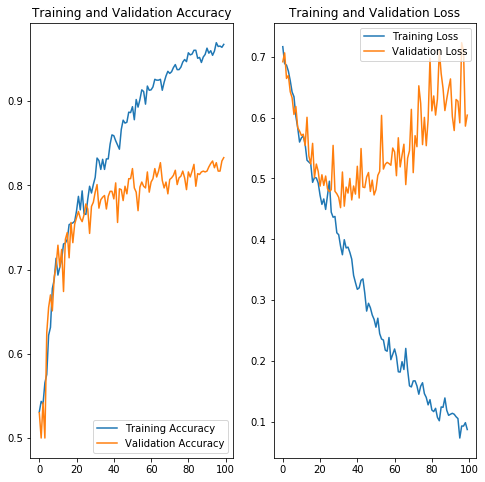

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()